# Descenso por Gradiente


El método de descenso por gradiente ([Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)), es uno de los algoritmos de optimización más populares en aprendizaje automático, particularmente por su uso extensivo en el campo de las redes neuronales. Es un método general de minimización para cualquier función $f$ 

Al método se le conoce por varios nombres.Como por ejemplo vanilla gradient descent / batch gradient descent. A veces se les da el nombre de [steepest descent](https://en.wikipedia.org/wiki/Method_of_steepest_descent), pero este término es más propio para aproximación analítica de integrales. El algoritmo también tiene su versión que busca el punto máximo de una función (Gradient Ascent).

## Idea del algoritmo

Imaginemos que nosotros mismos estamos en una montaña y nuestra visibilidad es nula, no podemos ver más allá de un 1cm de distancia, y queremos llegar a un punto seguro localizado en la parte más baja de la montaña.

Un forma de lograrlo sería dar un paso en cada una las cuatro orientaciones (este, oeste, norte y sur) y escoger aquella en la que bajemos más para dar un paso en esa dirección, y continuar así hasta encontrar un punto en dónde al revisar las alturas en todas las direcciones todas ellas sean más altas que nuestro punto actual.

![](DescensoGradiente1.gif)

### El Gradiente (Dirección de mayor descenso)

Recordemos que la primera derivada (pendiente) de una función mide la rapidez con que cambia una función, es decir cuando crece.

El gradiente es la generalización vectorial de la derivada, es un vector de tantas dimensiones como la función y cada dimensión contiene la derivada parcial en dicha dimensión:

$$\nabla f=\left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots \frac{\partial f}{\partial x_n} \right]$$

El gradiente $\nabla f_x$ es el vector que nos indica la dirección donde la función crece en un punto especifico $x$ y la normal de dicho vector es la rapidez con la que crece nuestra función. Por lo tanto, si deseamos minimzar una función $f$, debemos ir en dirección contrario a donde nos indica el gradiente.

### Tasa de Aprendizaje

Ahora sabemos en que dirección avanzar para descender, pero no cuánto descender.

Una estrategia sería si la función crece “mucho” descender mucho, y si crece “poco” descender poco. Es decir dar el paso en forma proporcional al gradiente.

$$\alpha \cdot -\nabla = - \alpha \nabla$$

### Algoritmo

Dada una posición $x_i$ podemos avanzar a una nueva posición $x_{i+1}$ que dependerá de la posición anterior donde nos encontremos, así como de la dirección y distancia en la que avancemos.

$$x_{i+1}=x_i - \alpha \cdot \nabla f(x)$$

<img src="Grad3.svg" width="300"/>

### Consideraciones a tener en cuenta

##### Minimo Local / Mínimo Global

El algoritmo no nos garantiza que lleguemos al punto más mínimo global, en ocasiones nos conducirá a mínimos locales. 

![](DescensoGradiente2.gif)

Este problema lo ataca [Descenso por Gradiente Estocástico](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) realizando el algoritmo en varias ocasiones con distintos puntos iniciales.

Existen aún más adecuaciones como Descenso por Gradiente Estocástico Adaptativo (AdaGrad)

##### Convergencia

La tasa de aprendizaje juega un papel importante en la convergencia debido a que una tasa "muy pequeña" puede necesitar muchas iteraciones para encontrar un punto mínimo y una tasa "muy grande" puede que le sea imposible encontrar el punto mínimo.

<img src="LearningRate.png" width="900"/>

## El modelo

En aprendizaje automático buscamos establecer una relación entre las variables de entradas y la de salida, la forma de establecer dicha relación es a través de un modelo. El modelo define como se relacionan las variables de entrada para producir la salida.

Por ejemplo, para una regresión lineal simple: $Y=mX+b$.

El modelo depende de un vector de parámetros $\theta = (m, b)$ de tal manera que buscamos encontrar una $\theta$ tal que $f_{\theta} (X) \approx Y$. Para medir que tan aproximados están nuestros valores $f_{\theta} (X)$ a $Y$ debemos utilizar una medida de error como el Error cuadrático Medio (MSE).

Por lo tanto, queremos minimizar una Función de Pérdida (Loss) que depende de $\theta$. Es decir,

$$\min_{\theta} \mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N( y_i - f_{\theta} (x_i) )^2$$

<img src="RegLineal.gif" width="900"/>


### Implementación en Python

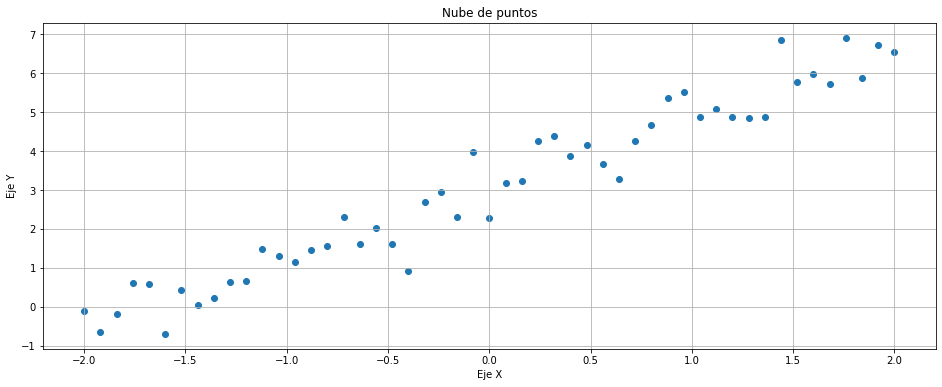

In [3]:
# Importamos las bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Creación de un conjunto de datos para entrenamiento
np.random.seed(0)
trX = np.linspace(-2, 2, 51)
trY = 3 + 2 * trX + np.random.randn(*trX.shape) * 0.5

# Graficamos los datos antes del encontrar los estimadores
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
axs.grid()
axs.set(title="Nube de puntos", xlabel="Eje X", ylabel="Eje Y")
axs.scatter(trX, trY)
plt.show()

Los valores que se obtienen son: 3.0601220308361645 1.8156841479281618 en pasos 755
Función de costo L(theta) = 0.26854069653595425


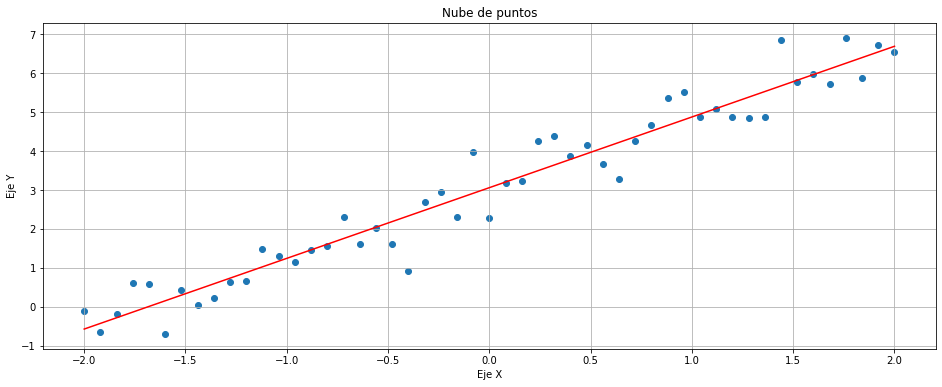

In [2]:
# Definición de los ajustes y parámetros iniciales
num_steps    = 1000  # Número Máximo de iteraciones
learningRate = 0.01  # Tasa de Aprendizaje
criteria     = 1e-8  # Criterio de Convergencia

# Puntos Iniciales de Theta
b_0, b_1 = 1, 1 

# Proceso iterativo
for step in range(0, num_steps):

    # Gradiente (Derivadas de B0 y B1)
    N = float(len(trX))
    b_0_gradient = 0
    b_1_gradient = 0
    for i in range(0, len(trX)):
        b_0_gradient = b_0_gradient - (2/N) * ( trY[i] - (b_0 + b_1 * trX[i]) )          # Derivada Parcial de B0
        b_1_gradient = b_1_gradient - (2/N) * ( trY[i] - (b_0 + b_1 * trX[i]) ) * trX[i] # Derivada Parcial de B1
    
    # Actualizamos los parámetros
    b_0 = b_0 - learningRate * b_0_gradient
    b_1 = b_1 - learningRate * b_1_gradient

    # Condición de convergencia
    if max( abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient) ) < criteria:
        break
    


# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en pasos", step+1)
print("Función de costo L(theta) = {}".format( np.mean( ( trY - (b_0 + b_1 * trX) )**2 ) ) )

# Graficamos los datos antes del encontrar los estimadores
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
axs.grid()
axs.set(title="Nube de puntos", xlabel="Eje X", ylabel="Eje Y")
axs.scatter( trX, trY )
axs.plot(trX, b_0 + b_1 * trX, ls="-", c="red" )
plt.show()